In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: Predicting House Prices

In [5]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/kc_house_data.csv'
data = pd.read_csv(url, index_col='id')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


This dataset contains house sale prices for King County, which includes Seattle. 
It includes homes sold between May 2014 and May 2015.

There are 21 columns:

| Column | Description |
| :- | -: |
| id | Unique ID for each home sold |
| date | Date of the home sale |
| price | Price of each home sold |
| bedrooms | Number of bedrooms |
| bathrooms | Number of bathrooms, where .5 accounts for a room with a toilet but no shower |
| sqft_living | Square footage of the apartments interior living space |
| sqft_lot | Square footage of the land space |
| floors | Number of floors |
| waterfront | A dummy variable for whether the apartment was overlooking the waterfront or not |
| view | An index from 0 to 4 of how good the view of the property was |
| condition | An index from 1 to 5 on the condition of the apartment |
| grade | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design |
| sqft_above | The square footage of the interior housing space hat is above ground level |
| sqft_basement | The square footage of the interior housing space that is below ground level |
| yr_built | The year the house was initially built |
| yr_renovated | The year of the house's last renovation |
| zipcode | What zipcode area the house is in |
| lat | Latitude |
| long | Longitude |
| sqft_living15 | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15 | The square footage of the land lots of the nearest 15 neighbors |

Your **goal** is to **train** a regression pipeline that predicts house prices, **tune** the pipeline hyperparameters, and **test** its performance.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures

X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]

In [12]:
X.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,3,7,1180,1955,0,1340,5650
6414100192,3,2.25,2570,7242,2.0,3,7,2170,1951,1991,1690,7639
5631500400,2,1.00,770,10000,1.0,3,6,770,1933,0,2720,8062


In [16]:
num_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
num_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

cat_features = []
cat_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # onehot encoder can take: handle_unknwon='ignore'
])

feature_processor = ColumnTransformer(transformers=[
    ('num_processor', num_processor, num_features),
    ('cat_processor', cat_processor, cat_features)
])

pipe = Pipeline(steps=[
    ('feature_processor', feature_processor),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression())
])

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# setup Ridge or Lasso in regression
pipe = Pipeline(steps=[
    ('feature_processor', feature_processor),
    ('poly_features', PolynomialFeatures(degree=1)),
    ('regressor', Ridge(alpha=1)) # use Ridge() or Lasso(). alpha defaults to 1
])



In [24]:
# setup grid search
alpha_list = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]
param_dic = {'poly_features__degree': [1,2,3,4], 
             'regressor__alpha': alpha_list}

grid = GridSearchCV(pipe,param_dic, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid.fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_processor',
                                        ColumnTransformer(transformers=[('num_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['bedrooms',
                                                                          'bathrooms',
                                                                          'sqft_living',
                                                                          'sqft_lot',
                                                                          'floors',
                                                                          'condition',
                                                                          'grade',
                                                                          'sqft_above',
                                                                          'yr_built',
                                                                          'yr_renovated',
                                                                          'sqft_living15',
                                                                          'sqft_lot15'])...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('poly_features',
                                        PolynomialFeatures(degree=1)),
                                       ('regressor', Ridge(alpha=1))]),
             n_jobs=-1,
             param_grid={'poly_features__degree': [1, 2, 3, 4],
                         'regressor__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

**Plot** the observed prices against the predicted prices.

params: {'poly_features__degree': 3, 'regressor__alpha': 0.1}
MSE: 187000.95804243552
MAE: 122604.56747688809


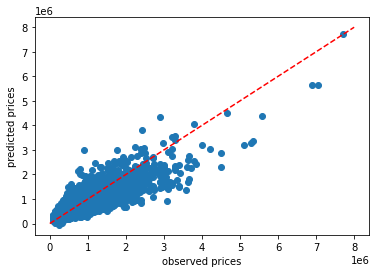

In [28]:
import matplotlib.pyplot as plt
#plt.scatter(X,y=[1,100])
best_pipe = grid.best_estimator_
y_pred = best_pipe.predict(X)

# model evaluatoin
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def TestPipe(y,y_pred):
    print('params:',grid.best_params_)
    # MSE
    print('MSE:',np.sqrt(mean_squared_error(y,y_pred)))
    # MAE
    print('MAE:',mean_absolute_error(y,y_pred))
    
    # plot predictions and actual values
    plt.scatter(y,y_pred)
    plt.xlabel('observed prices')
    plt.ylabel('predicted prices')
    plt.plot([0,8000000], [0,8000000], 'r--')
TestPipe(y,y_pred)

## Seems to be a general trend but plenty of variation. 